<a href="https://colab.research.google.com/github/TofayelAhamedTopu/Machine_Learning/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tofayel Ahamed Topu
# 172-15-9676



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz #decision tree classifier into dot file
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Loading Data
**Pima Indian Diabetes dataset:** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.<br/> The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.<br/><br/>
[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#Feature Selection
##Divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
feature = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[feature] # Features
y = data.Outcome # Target variable

#Splitting Data
##pass 3 parameters features, target, and test_set size

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

#Building Decision Tree Model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Visualizing Decision Trees

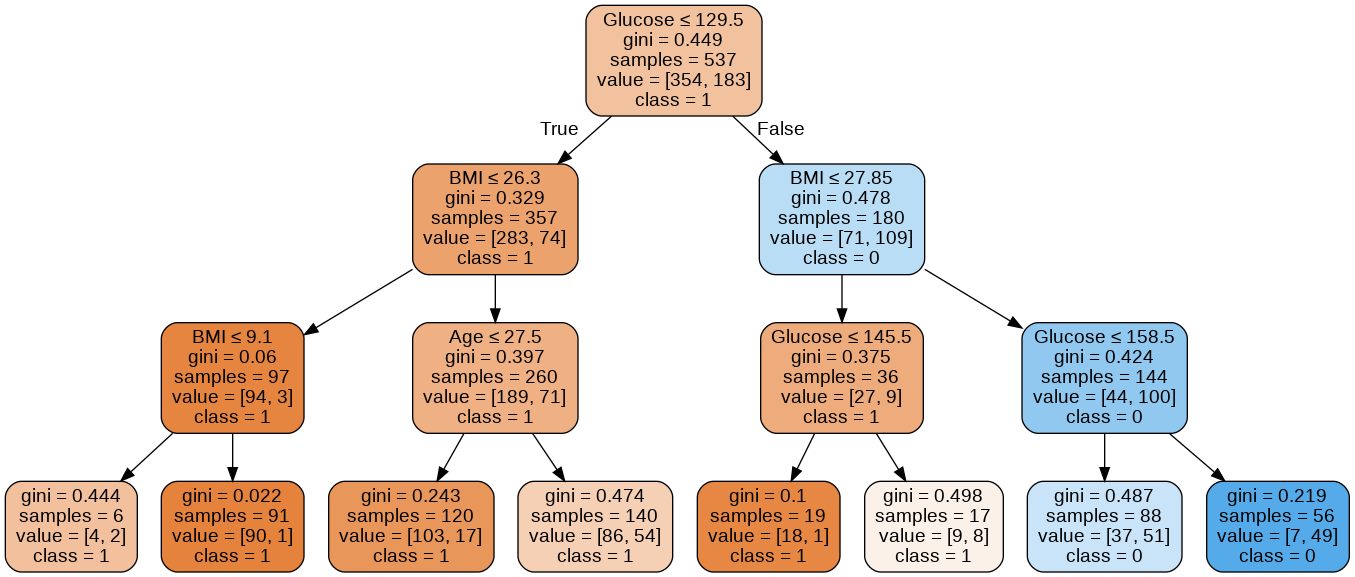

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature,class_names=['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#Predict Values
##We can use the Decision Tree to predict new values.

Example:  Imagine a person whose<br/>
Pregnancies:10;<br/> Glucose:115;<br/>	BloodPressure:66;<br/>SkinThickness:0;<br/>	Insulin:0;<br/>	BMI:35.3;<br/>DiabetesPedigreeFunction:0.134;<br/>	Age:30;


In [ ]:
print(clf.predict([[10,115,66,0,0,35.3,0.134,30]]))

[0]


##Possibility of diabetes is 0 mins no possibility of  Diabetes

#Result Explained
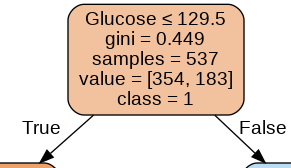

Glucose <= 129.5 means glucose of 129.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right)<br/><br/>
gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.<br/><br/>
sample= 537 means that there are 537 patient left at this point in the decision, which is all of them since this is the first step.<br/><br/>
value= [354,183] means that of these 537 comedians, 354 will get a "Yes(1)", and 137 will get a "No(0)"<br/><br/>
Gini = 1 - (x/n)^2 - (y/n)^2<br/>
Where x is the number of positive answers("Yes"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this <br>calculation:  1 - (354 / 537)^2-(183 / 537)^2 = 0.449



# True - 357 Comedians Continue
#BMI

# 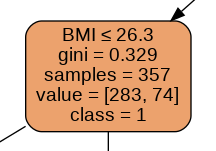


BMI<=26.3 means BMI of 26.3 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right)<br/><br/>
gini=0.329 means that about 329% of the samples would go in one direction<br/><br/>
sample= 357 means that there are 357 patient left at this point in the decision, which is all of them since this is the first step.<br/><br/>
value= [283,74] means that of these 537 comedians, 354 will get a "No(0)", and 137 will get a "Yes(1)"


#False - 180 Comedians Continue
#BMI
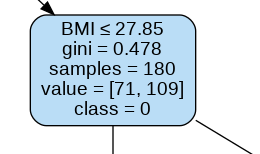

BMI<=27.85 means BMI of 27.85 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right)

gini=0.478 means that about 478% of the samples would go in one direction

sample= 180 means that there are 180 patient left at this point in the decision, which is all of them since this is the first step.

value= [71,109] means that of these 71 comedians, 71 will get a "No(0)", and 109 will get a "Yes(1)"